In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import vice

# from surp.src.analysis import plotting_utils as pluto
from surp.analysis.apogee_analysis import subgiants
import arya
from surp.analysis import apogee_analysis as aah

from surp.analysis.vice_model import vice_model

In [4]:
width = 4
ϕ = np.sqrt(2)
height = width/ϕ
arya.style.set_size((width, height))
#arya.style.set_fontsize(12)


In [5]:
plt.rcParams['text.latex.preamble'] = r"""
       \usepackage{siunitx}
       \sisetup{detect-all}
       \usepackage{helvet}
       \usepackage{sansmath}
       \sansmath
"""
plt.rcParams["figure.dpi"] = 200

bg_color = "black"
fg_color = [0.8, 0.8, 0.8, 1]

plt.rcParams["figure.facecolor"] = bg_color
plt.rcParams["axes.edgecolor"] = fg_color
plt.rcParams["axes.facecolor"] = bg_color
plt.rcParams["axes.titlecolor"] = fg_color
plt.rcParams["xtick.color"] = fg_color
plt.rcParams["ytick.color"] = fg_color
plt.rcParams["xtick.labelcolor"] = fg_color
plt.rcParams["ytick.labelcolor"] = fg_color
plt.rcParams["text.color"] = fg_color
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["axes.labelcolor"] = fg_color
plt.rcParams["xtick.minor.visible"] = False
plt.rcParams["ytick.minor.visible"] = False
plt.rcParams["savefig.facecolor"] = bg_color

arya.style.set_fontsize(16)

In [7]:
fiducial = vice_model("../../../out/C11_f0.2.json")

one file saved at ./cooh_scatter.png


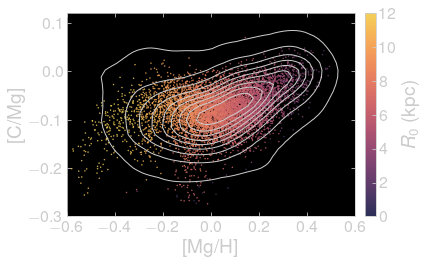

In [6]:
s = fiducial.stars["solar"]

N = len(s)
dx = 0.03
dy = 0.03
sp = arya.Subplot()
aah.plot_contour("[mg/h]", "[c/mg]", ax=sp.mpl_ax, zorder=3, color=fg_color)

scat = arya.Scatter(s["[mg/h]"] + np.random.normal(0, dx, N), s["[c/mg]"] + np.random.normal(0, dy, N), 
             c = s["r_origin"], s=0.2, zorder=2, subplot=sp)
scat.clim = (0, 12)
cb = arya.Colorbar(subplot=sp, layer=scat, row=0, col=1, width=arya.Length(0.05*height))
cb.label = "$R_0$ (kpc)"


sp.x.label=r"[Mg/H]"
sp.y.label=r"[C/Mg]"
sp.x.lim=(-0.6, 0.6)
sp.y.lim=(-0.3, 0.12)

sp.save("cooh_scatter.png")

In [8]:
s = fiducial.stars_unsampled


filt = s["r_origin"]> 7
filt &= s["r_origin"] < 9

r0 = s["r_origin"][filt]
r1 =  s["r_final"][filt]

dr = (r1 - r0)
t0 = s["formation_time"][filt]


In [9]:
T_END = 13.2

In [10]:
class Particle:
    def __init__(self, r0, r1, t0):
        self.r0 = r0
        self.r1 = r1
        self.t0 = t0
        
        self.theta0 = np.random.uniform(0, 2*np.pi)
        self.dr = self.r1 - self.r0
        self.omega = 31 * self.r0/8
        
    def position(self, t):
        
        delt_r = np.where(t > self.t0, 
                          self.dr*np.sqrt((t-self.t0)/(T_END - self.t0)), 
                          np.nan)
        
        r_t = self.r0 + delt_r
        theta_t = self.theta0 + self.omega * t
        
        return (theta_t, r_t)
    
    def color(self, t):
        return np.exp(-(t-self.t0)**2/0.2**2)
    
    def position2(self, t):
        return np.where( np.abs(self.t0-t) < 0.6, (self.theta0, self.r0),
                        (np.nan, np.nan)
                       )
        
    

In [11]:
ps = []
for i in range(len(r0)):
    ps.append(Particle(r0[i], r1[i], t0[i]))

In [12]:
from matplotlib import animation

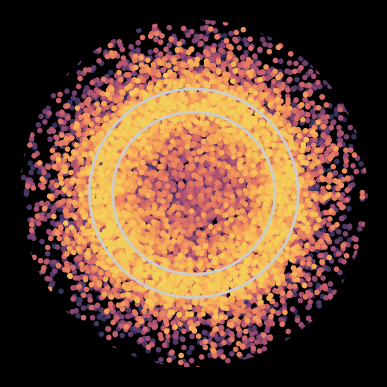

In [13]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})


ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylim(0, 15)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_theta_direction(-1)
ax.spines['polar'].set_visible(False)

pos = [p.position(13.2) for p in ps]

theta = np.random.uniform(0, 2*np.pi, len(r0))

ths = [a[0] for a in pos]
rs = [a[1] for a in pos]
line = ax.scatter(ths, rs, s=1, c=t0, cmap=arya.style.get_cmap())


th = np.linspace(0, 2*np.pi, 1000)

plt.plot(th, np.repeat(7, 1000), c=fg_color)
plt.plot(th, np.repeat(9, 1000), c=fg_color)

plt.savefig("r_mig.png")

/tmp/slurmtmp.24053300/ipykernel_261683/1517578748.py:14: RuntimeWarning: invalid value encountered in sqrt
  self.dr*np.sqrt((t-self.t0)/(T_END - self.t0)),


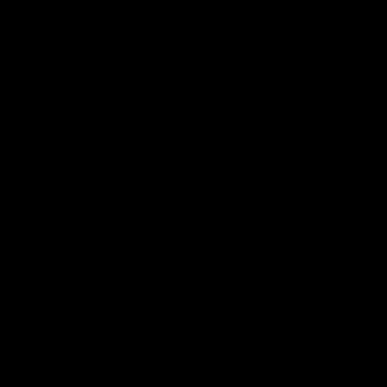

In [14]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
theta = np.random.uniform(0, 2*np.pi, len(r0))
line = ax.scatter(theta, r0, s=1, c=t0, cmap=arya.style.get_cmap())

ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylim(0, 15)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_theta_direction(-1)

ax.yaxis.visible=False
ax.set_theta_direction(-1)
ax.spines['polar'].set_visible(False)
def animate(i):
    t = i/20
    pos = [p.position(t) for p in ps]
    line.set_offsets(pos)
    line.set_array(t0)
    print(t, end=" Gyr\r")

    return line,

ani = animation.FuncAnimation(fig, animate, interval=10, frames=260, repeat=False)


writervideo = animation.PillowWriter(fps=60)
ani.save("r_migration.gif", writer=writervideo, dpi=100)

In [137]:
s = fiducial.stars["all"]


filt = s["r_origin"]> 0
filt &= s["r_origin"] < 20

r0 = s["r_origin"][filt]
r1 =  s["r_final"][filt]

dr = (r1 - r0)
t0 = s["formation_time"][filt]
ms = s["mass"][filt]

ps = []
for i in range(len(r0)):
    ps.append(Particle(r0[i], r1[i], t0[i]))

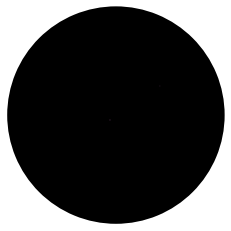

In [140]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
theta = np.random.uniform(0, 2*np.pi, len(r0))
line = ax.scatter(theta, r0, s=ms/1e6, c=np.random.uniform(size=len(r0)), cmap=arya.style.get_cmap())

ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylim(0, 15.5)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_theta_direction(-1)

ax.yaxis.visible=False
ax.set_theta_direction(-1)
ax.spines['polar'].set_visible(False)
def animate(i):
    t = i/20
    t0 = [p.color(t) for p in ps]
    offs = [p.position2(t) for p in ps]
    line.set_offsets(offs)
    line.set_array(t0)
    print(t, end=" Gyr\r")

    return line,

ani = animation.FuncAnimation(fig, animate, interval=5, frames=260, repeat=False)


writervideo = animation.PillowWriter(fps=60)
ani.save("star_formation.gif", writer=writervideo, dpi=100)

In [50]:
def get_sfr(t, R):
    return fiducial.history[(fiducial.history.time == t) & (fiducial.history.R == R)]["sfr"][0]

In [85]:
np.nanmax(fiducial.history.sfr/(fiducial.history.R+0.05))

0.1865845

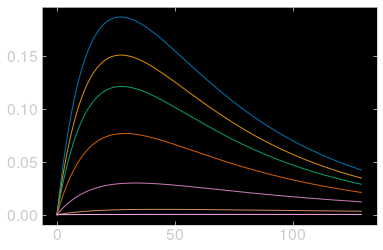

In [102]:
for R in [0,0.5,1,2,4,8,15]:
    t = np.arange(0, 130)
    plt.plot(t, [get_sfr(a/10, R)/(R+0.05) for a in t])

In [ ]:
def sfh(t):
    return (1-np.exp(-t/2)) * np.exp(-t/2.7)


In [64]:
cmap = arya.style.get_cmap()

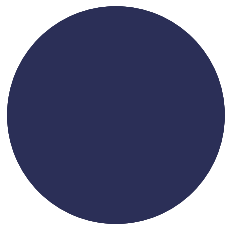

In [104]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

sfr_max = 0.19
rings = []
for i in range(200):
    R = i/10
    rings.append(plot_ring(R))

    
ax.grid(False)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_ylim(0, 15)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_theta_direction(-1)
ax.yaxis.visible=False
ax.set_theta_direction(-1)
ax.spines['polar'].set_visible(False)

def animate(i):
    t = i/10
    print(t, end=" Gyr\r")

    for j in range(200):
        sfr = get_sfr(R=j/10, t=t) / (j/10 + 0.05)
        c=cmap(256/sfr_max*sfr)
        rings[j].set_color(c)

    return

ani = animation.FuncAnimation(fig, animate, interval=10, frames=132, repeat=False)


writervideo = animation.PillowWriter(fps=60)
ani.save("sfr.gif", writer=writervideo, dpi=100)